In [1]:
import seaborn as sns
import ast

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import json

In [5]:
df = pd.read_csv('raw.csv')

In [6]:
df

,name,game_description,genre,list_genre
0,DOOM,"About This Game Developed by id software, the...",Action,['Action']
1,PLAYERUNKNOWN'S BATTLEGROUNDS,About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Action,Adventure,Massively Multiplayer","['Action', 'Adventure', 'Massively Multiplayer']"
2,BATTLETECH,About This Game From original BATTLETECH/Mec...,"Action,Adventure,Strategy","['Action', 'Adventure', 'Strategy']"
3,DayZ,About This Game The post-soviet country of Ch...,"Action,Adventure,Massively Multiplayer","['Action', 'Adventure', 'Massively Multiplayer']"
4,EVE Online,About This Game,"Action,Free to Play,Massively Multiplayer,RPG,...","['Action', 'Free to Play', 'Massively Multipla..."
...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,"About This Content Play ""Ghost Division"" by S...","Casual,Simulation","['Casual', 'Simulation']"
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,"About This Content Play ""Trippin’ on a Hole i...","Casual,Simulation","['Casual', 'Simulation']"
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,About This Content Quests of Doom 4: A Midni...,"Indie,RPG,Strategy","['Indie', 'RPG', 'Strategy']"
40831,Mega Man X5 Sound Collection,About This Content Get equipped with the stun...,Action,['Action']


In [7]:
df.dropna(inplace=True)

In [8]:
all_genres = df['list_genre'].apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts()

In [9]:
all_genres

Indie                    22832
Action                   15224
Casual                   11989
Adventure                11848
Simulation                8703
Strategy                  7964
RPG                       6950
Early Access              2818
Free to Play              2613
Sports                    1724
Racing                    1383
Massively Multiplayer     1275
Design & Illustration      622
Utilities                  454
Web Publishing             420
Animation & Modeling       241
Education                  168
Video Production           150
Audio Production           125
Software Training          110
Photo Editing               67
Game Development            65
Accounting                   8
Valve                        4
HTC                          1
Movie                        1
dtype: int64

In [10]:
df_val_counts = pd.DataFrame(all_genres)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['unique_values', 'counts'] # change column names

In [11]:
df_value_counts_reset

,unique_values,counts
0,Indie,22832
1,Action,15224
2,Casual,11989
3,Adventure,11848
4,Simulation,8703
5,Strategy,7964
6,RPG,6950
7,Early Access,2818
8,Free to Play,2613
9,Sports,1724


In [12]:
bad = ['Valve','HTC','Movie']

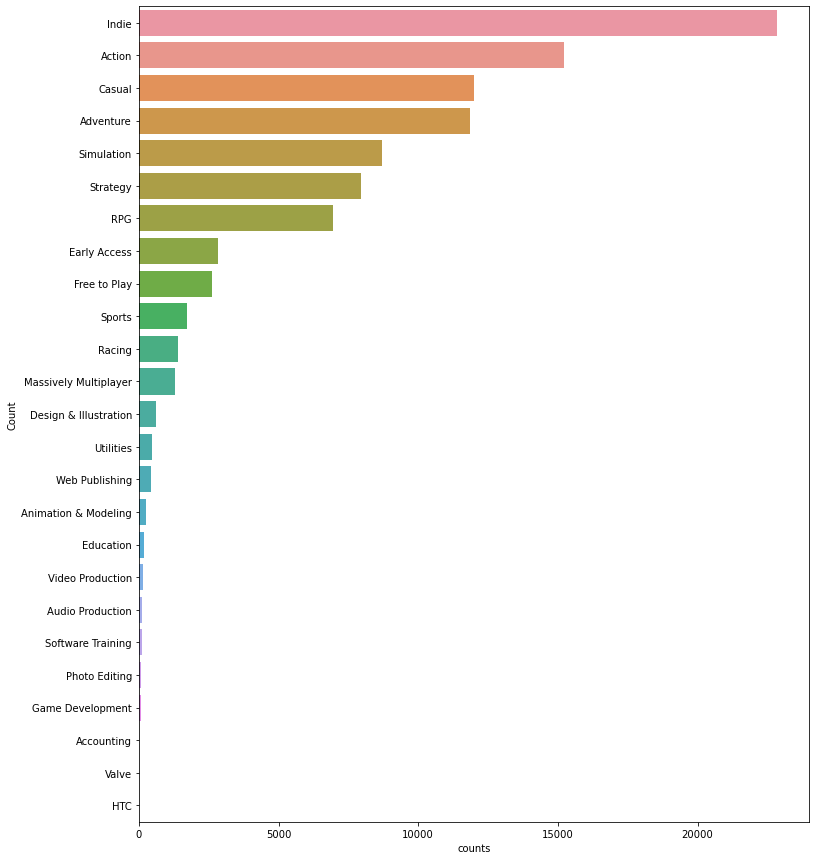

In [13]:
g = df_value_counts_reset.nlargest(columns="counts",n=25) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "counts", y = "unique_values") 
ax.set(ylabel = 'Count') 
plt.show()

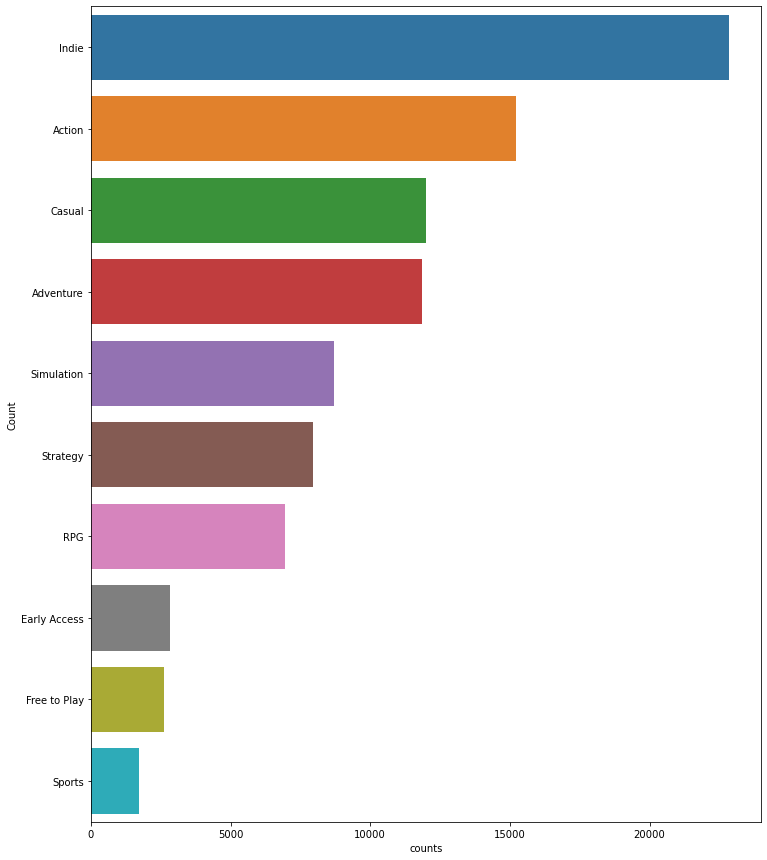

In [14]:
g = df_value_counts_reset.nlargest(columns="counts",n=10) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "counts", y = "unique_values") 
ax.set(ylabel = 'Count') 
plt.show()

In [15]:
df['actual_list_genre'] = df['list_genre'].apply(ast.literal_eval)

In [16]:

# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except letters
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [17]:
df['clean_description']=df['game_description'].apply(lambda x: clean_text(x))

In [18]:

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  

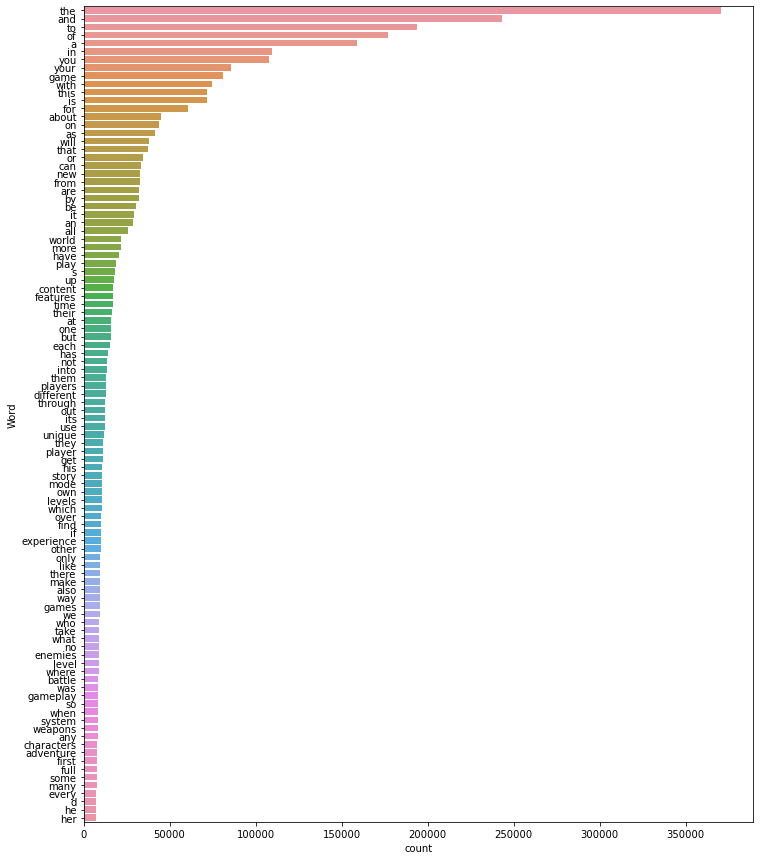

In [19]:
# print 100 most frequent words 
freq_words(df['clean_description'], 100)

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['game','content','play','developed'])
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)


In [21]:
df['clean_description'] = df['clean_description'].apply(lambda x: remove_stopwords(x))

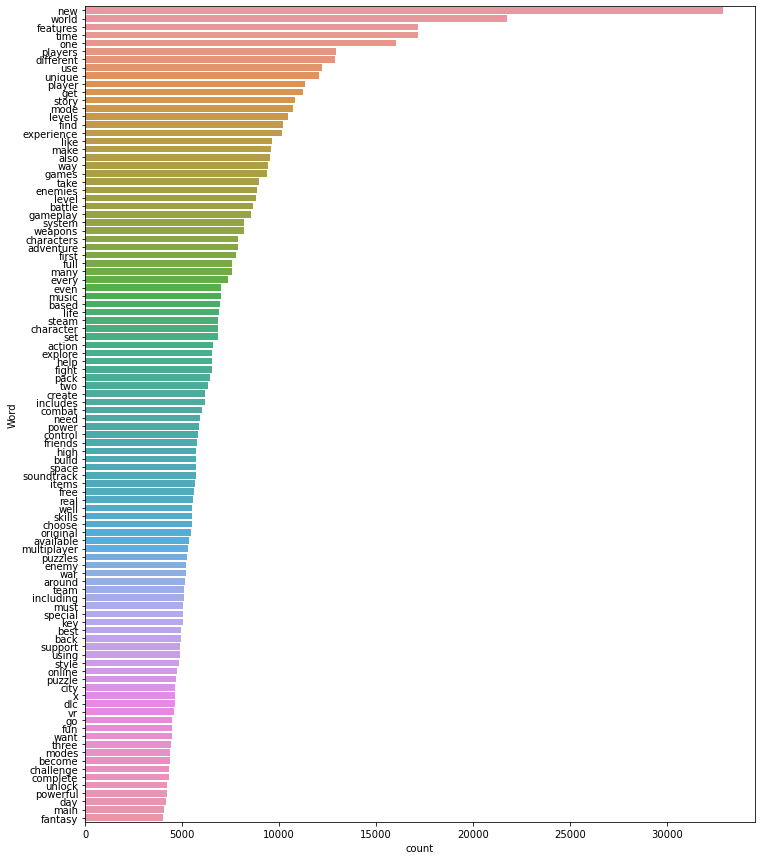

In [22]:
freq_words(df['clean_description'], 100)

In [23]:
df.head()

,name,game_description,genre,list_genre,actual_list_genre,clean_description
0,DOOM,"About This Game Developed by id software, the...",Action,['Action'],[Action],id software studio pioneered first person shoo...
1,PLAYERUNKNOWN'S BATTLEGROUNDS,About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Action,Adventure,Massively Multiplayer","['Action', 'Adventure', 'Massively Multiplayer']","[Action, Adventure, Massively Multiplayer]",playerunknowns battlegrounds battle royale sho...
2,BATTLETECH,About This Game From original BATTLETECH/Mec...,"Action,Adventure,Strategy","['Action', 'Adventure', 'Strategy']","[Action, Adventure, Strategy]",original battletech mechwarrior creator jordan...
3,DayZ,About This Game The post-soviet country of Ch...,"Action,Adventure,Massively Multiplayer","['Action', 'Adventure', 'Massively Multiplayer']","[Action, Adventure, Massively Multiplayer]",post soviet country chernarus struck unknown v...
4,EVE Online,About This Game,"Action,Free to Play,Massively Multiplayer,RPG,...","['Action', 'Free to Play', 'Massively Multipla...","[Action, Free to Play, Massively Multiplayer, ...",


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['actual_list_genre'])

# transform target variable
y = multilabel_binarizer.transform(df['actual_list_genre'])

In [25]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [26]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df['clean_description'], y, test_size=0.2, random_state=42)

In [27]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [28]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [29]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [30]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Programming\Anaconda\lib\site-packages\sklearn\multiclass.py:80: UserWarning: Label not 14 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


OneVsRestClassifier(estimator=LogisticRegression())

In [31]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [32]:
y_pred[3]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [33]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Adventure',)

In [34]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.698619809788912

In [35]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [36]:
t = 0.35 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [37]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.731617554384815

In [38]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [39]:
for i in range(10): 
  k = xval.sample(1).index[0] 
  print("Game: ", df['name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['actual_list_genre'][k], "\n")

Game:  ばるばろっさ! ～すすめ? 赤軍少女旅団～(全年齢版) 
Predicted genre:  [()]
Actual genre:  ['Indie', 'RPG', 'Strategy'] 

Game:  The Pit And The Pendulum 
Predicted genre:  [('Adventure', 'Indie')]
Actual genre:  ['Adventure', 'Casual', 'Indie'] 

Game:  Mind Portal 
Predicted genre:  [('Adventure', 'Casual', 'Indie')]
Actual genre:  ['Adventure', 'Casual', 'Indie'] 

Game:  Space Pilgrim Academy: Year 1 
Predicted genre:  [('Adventure', 'Indie')]
Actual genre:  ['Adventure', 'Indie'] 

Game:  Fantasy Grounds - Taverns & Inns Pack 1 - Living Maps (Map Pack) 
Predicted genre:  [('Indie', 'RPG', 'Strategy')]
Actual genre:  ['Indie', 'RPG', 'Strategy'] 

Game:  Sid Meier's Pirates! Gold Plus (Classic) 
Predicted genre:  [('Adventure',)]
Actual genre:  ['Adventure', 'Simulation'] 

Game:  Crystal Quest Classic 
Predicted genre:  [('Casual', 'Indie')]
Actual genre:  ['Action', 'Strategy'] 

Game:  Rocksmith® 2014 – Crobot - “Nowhere to Hide” 
Predicted genre:  [('Casual', 'Simulation')]
Actual genre:  ['Cas

In [40]:
desc = "Fight your way through an exciting action-adventure game, inspired by classic dungeon crawlers and set in the Minecraft universe! Brave the dungeons alone, or team up with friends! Up to four players can battle together through action-packed, treasure-stuffed, wildly varied levels – all in an epic quest to save the villagers and take down the evil Arch-Illager!"

In [41]:
print("Game: MineCraft Dungeons", "\nPredicted genre: ", infer_tags(desc))

Game: MineCraft Dungeons 
Predicted genre:  [('Action', 'Adventure')]


In [49]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf.pkl', 'wb'))
pickle.dump(multilabel_binarizer, open('binarizer.pkl', 'wb'))